In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

## Apendice Sección 2.3

#### 2.3.1.3 Ejemplos de aplicación del modelo de series de potencias

##### 2.3.1.3.1 Ejemplo: Ley de reacción de orden cero

Adaptado de: [chem.libretexts.org](https://chem.libretexts.org/Bookshelves/General_Chemistry/Map%3A_General_Chemistry_(Petrucci_et_al.)/14%3A_Chemical_Kinetics/14.04%3A_Zero-Order_Reactions)

La reacción de descomposición de $\mathrm{N_2O}$ en $\mathrm{N_2}$ y $\mathrm{O_2}$, sobre una superficie de $\mathrm{Pt}$ (catalizador), exhibe una cinética de orden cero. La presencia del catalizador permite que la reacción ocurra en el rango $200$ a $400$ $\mathrm{^{\circ}C}$. La concentración de $\mathrm{N_2O}$ no tiene incidencia en la tasa de reacción siempre y cuando haya suficiente $\mathrm{N_2O}$ para cubrir toda la superficie del catalizador. Sin la presencia del catalizador, esta reacción requiere temperaturas superiores a $700$ $\mathrm{^{\circ}C}$ para llevarse a cabo.

$$ \mathrm{2 {N_2O}_{(g)} \xrightarrow[]{Pt} 2 {N_2}_{(g)} + {O_2}_{(g)}}$$

Con notación simplificada, la reacción se puede expresar como:

$$ \mathrm{2A \xrightarrow[]{X} 2B + C}$$

Y las velocidades relativas de reacción para el resto de las especies están dadas por:

$$\frac{r_{\mathrm{A}}}{-2} = \frac{r_{\mathrm{B}}}{2} = \frac{r_{\mathrm{C}}}{1}$$

**Construcción de un modelo cinético de orden cero**:

$$r_{\mathrm{A}} = k$$

$$\frac{dC_{\mathrm{A}}}{dt} = r_{\mathrm{A}}$$

$$\frac{dC_{\mathrm{B}}}{dt} = -r_{\mathrm{A}}$$

$$\frac{dC_{\mathrm{C}}}{dt} = -\frac{1}{2}r_{\mathrm{A}}$$

In [2]:
# Modelo cinético
def kinetic_model0(t, c, k):
    rA = -k # constante cinética
    dcA_dt = rA; dcB_dt = -rA; dcC_dt = -1/2*rA
    return np.array([dcA_dt, dcB_dt, dcC_dt])

# Terminar el cálculo si el reactivo A es consumido completamente
def Aconsumed(t, c, k): return c[0] 
Aconsumed.terminal = True

In [3]:
# parámetros de entrada para solución del sistema de ecuaciones diferenciales ordinarias
k = 0.1 # constante de reacción orden cero, en [u.a.^-1]
c0 = np.array([1, 0, 0]) # concentraciones iniciales de [A, B, C], en [u.a.]
t_span = (0, 20) # rango de tiempo para integración, en [u.a.]
dt = 0.1 # paso de tiempo, en [u.a.]
t_eval = np.arange(t_span[0], t_span[1]+dt, dt) # array con tiempos en los que se evalua la integración, en [u.a.]

# solución del sistema de ecuaciones diferenciales ordinarias, considerando evento para terminación del cálculo.
sol0 = solve_ivp(kinetic_model0, t_span, y0=c0, args=(k,), events=Aconsumed, t_eval=t_eval)

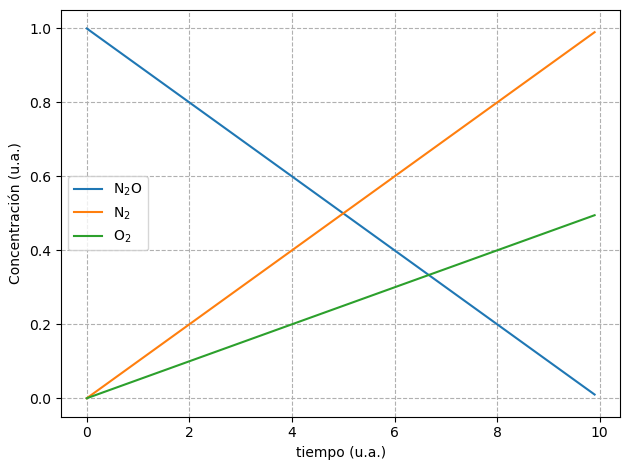

In [4]:
fig, ax = plt.subplots()
ax.plot(sol0.t, sol0.y[0], label=r'$\mathrm{N_2O}$')
ax.plot(sol0.t, sol0.y[1], label=r'$\mathrm{N_2}$')
ax.plot(sol0.t, sol0.y[2], label='$\mathrm{O_2}$')
ax.set(xlabel="tiempo (u.a.)", ylabel="Concentración (u.a.)")
ax.grid(ls="--")
ax.legend()
fig.tight_layout()
plt.show()

##### 2.3.1.3.2 Ejemplo: Ley de reacción de orden uno

Adaptado de: [chem.libretexts.org](https://chem.libretexts.org/Bookshelves/General_Chemistry/Map%3A_General_Chemistry_(Petrucci_et_al.)/14%3A_Chemical_Kinetics/14.05%3A_First-Order_Reactions)

A alta temperatura el cloetano produce ácido clorhídrico y etileno de acuerdo a la siguiente reacción:

$$ \mathrm{{CH_3CH_2Cl}_{(g)} \xrightarrow[]{\Delta} {HCl}_{(g)} + {C_2H_4}_{(g)}}$$

Con notación simplificada, la reacción se puede expresar como:

$$ \mathrm{A \xrightarrow[]{\Delta} B + C}$$

Y las velocidades relativas de reacción para el resto de las especies están dadas por:

$$\frac{r_{\mathrm{A}}}{-1} = \frac{r_{\mathrm{B}}}{1} = \frac{r_{\mathrm{C}}}{1}$$

**Construcción de un modelo cinético de orden uno**:

$$r_{\mathrm{A}} = k C_{\mathrm{A}}$$

$$\frac{dC_{\mathrm{A}}}{dt} = r_{\mathrm{A}}$$

$$\frac{dC_{\mathrm{B}}}{dt} = -r_{\mathrm{A}}$$

$$\frac{dC_{\mathrm{C}}}{dt} = -r_{\mathrm{A}}$$

In [5]:
# Modelo cinético
def kinetic_model1(t, c, k):
    cA, cB, cC = c
    rA = -k*cA # constante cinética
    dcA_dt = rA; dcB_dt = -rA; dcC_dt = -rA
    return np.array([dcA_dt, dcB_dt, dcC_dt])

# Terminar el cálculo si el reactivo A es consumido completamente
def Aconsumed(t, c, k): return c[0] 
Aconsumed.terminal = True

In [6]:
# parámetros de entrada para solución del sistema de ecuaciones diferenciales ordinarias
k = 1e-1 # constante de reacción orden cero, en [u.a.^-1]
c0 = np.array([1, 0.1, 0]) # concentraciones iniciales de [A, B, C], en [u.a.]
t_span = (0, 100) # rango de tiempo para integración, en [u.a.]
dt = 1 # paso de tiempo, en [u.a.]
t_eval = np.arange(t_span[0], t_span[1]+dt, dt) # array con tiempos en los que se evalua la integración, en [u.a.]

# solución del sistema de ecuaciones diferenciales ordinarias, considerando evento para terminación del cálculo.
sol1 = solve_ivp(kinetic_model1, t_span, y0=c0, args=(k,), events=Aconsumed, t_eval=t_eval)

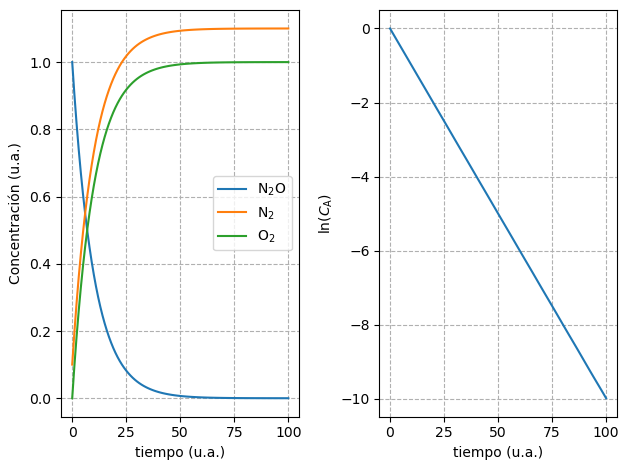

In [7]:
fig, axes = plt.subplots(ncols=2)
ax=axes[0]
ax.plot(sol1.t, sol1.y[0], label=r'$\mathrm{N_2O}$')
ax.plot(sol1.t, sol1.y[1], label=r'$\mathrm{N_2}$')
ax.plot(sol1.t, sol1.y[2], label='$\mathrm{O_2}$')
ax.set(xlabel="tiempo (u.a.)", ylabel="Concentración (u.a.)")
ax.grid(ls="--")
ax.legend()
ax=axes[1]
ax.plot(sol1.t, np.log(sol1.y[0]))
ax.set(xlabel='tiempo (u.a.)', ylabel=r"$\ln (C_{\mathrm{A}})$")
ax.grid(ls="--")
fig.tight_layout()
plt.show()

##### 2.3.1.3.3 Ejemplo: Ley de reacción de orden dos

Adaptado de: [chem.libretexts.org](https://chem.libretexts.org/Bookshelves/General_Chemistry/Map%3A_General_Chemistry_(Petrucci_et_al.)/14%3A_Chemical_Kinetics/14.06%3A_Second-Order_Reactions)

A alta temperatura el dióxido de nitrógeno se descompone en óxido nitrico y oxígeno de acuerdo con la reacción:

$$ \mathrm{2{NO_2}_{(g)} \xrightarrow[]{\Delta} 2{NO}_{(g)} + {O_2}_{(g)}}$$

Con notación simplificada, la reacción se puede expresar como:

$$ \mathrm{2A \xrightarrow[]{\Delta} 2B + C}$$

Y las velocidades relativas de reacción para el resto de las especies están dadas por:

$$\frac{r_{\mathrm{A}}}{-2} = \frac{r_{\mathrm{B}}}{2} = \frac{r_{\mathrm{C}}}{1}$$

**Construcción de un modelo cinético de orden dos**:

$$r_{\mathrm{A}} = k C_{\mathrm{A}}^2$$

$$\frac{dC_{\mathrm{A}}}{dt} = r_{\mathrm{A}}$$

$$\frac{dC_{\mathrm{B}}}{dt} = -r_{\mathrm{A}}$$

$$\frac{dC_{\mathrm{C}}}{dt} = -\frac{1}{2} r_{\mathrm{A}}$$

In [8]:
# Modelo cinético
def kinetic_model2(t, c, k):
    cA, cB, cC = c
    rA = -k*(cA)**2 # constante cinética
    dcA_dt = rA; dcB_dt = -rA; dcC_dt = -rA
    return np.array([dcA_dt, dcB_dt, dcC_dt])

# Terminar el cálculo si el reactivo A es consumido completamente
def Aconsumed(t, c, k): return c[0] 
Aconsumed.terminal = True

In [9]:
# parámetros de entrada para solución del sistema de ecuaciones diferenciales ordinarias
k = 1e-1 # constante de reacción orden cero, en [u.a.^-1]
c0 = np.array([1, 0.1, 0]) # concentraciones iniciales de [A, B, C], en [u.a.]
t_span = (0, 100) # rango de tiempo para integración, en [u.a.]
dt = 1 # paso de tiempo, en [u.a.]
t_eval = np.arange(t_span[0], t_span[1]+dt, dt) # array con tiempos en los que se evalua la integración, en [u.a.]

# solución del sistema de ecuaciones diferenciales ordinarias, considerando evento para terminación del cálculo.
sol2 = solve_ivp(kinetic_model2, t_span, y0=c0, args=(k,), events=Aconsumed, t_eval=t_eval)

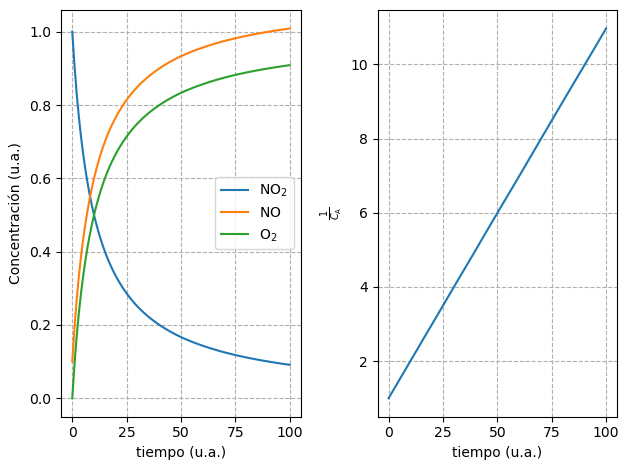

In [10]:
fig, axes = plt.subplots(ncols=2)
ax=axes[0]
ax.plot(sol2.t, sol2.y[0], label=r'$\mathrm{NO_2}$')
ax.plot(sol2.t, sol2.y[1], label=r'$\mathrm{NO}$')
ax.plot(sol2.t, sol2.y[2], label='$\mathrm{O_2}$')
ax.set(xlabel="tiempo (u.a.)", ylabel="Concentración (u.a.)")
ax.grid(ls="--")
ax.legend()
ax=axes[1]
ax.plot(sol2.t, 1/(sol2.y[0]))
ax.set(xlabel='tiempo (u.a.)', ylabel=r"$\frac{1}{C_{\mathrm{A}}}$")
ax.grid(ls="--")
fig.tight_layout()
plt.show()